# Strategy Learner


---

This notebook provides an example of how a StrategyLearner works. This code is also available in the `__main__` function of `StrategyLearner.py`.

## Summary

We choose a stock, an in-sample period and an out-of-sample period. We train a StrategyLearner on the data from the in-sample period and test it on the out-of-sample period. Then we report the performances of the portfolio (only consisting of the stock) and benchmark for both periods. Benchmark is The performance of a portfolio starting with ``$``100,000 cash, investing in 1000 shares of JPM and holding that position.

* In this notebook, we choose the CME S&P 500 Emini futures contract (March Contracts ESH2009 and ESH2010)
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is ``$``100,000.
* Allowable positions are: 5 contracts Long, 5 contracts short, 0 shares.
* There is no limit on leverage.
* Transaction costs: Commission: $0.00, Impact: 0.0.

__*The performance of portfolio is better than benchmark in both periods!*__

## Table of contents:
[1) In-sample performance](#first)

[2) Out-of-sample performance](#second)

[3) Out-of-sample performance](#third)

Import relevant libraries and modules

In [1]:
import datetime as dt

from util import create_df_benchmark
from StrategyLearner import StrategyLearner
from marketsim import compute_portvals_single_symbol, market_simulator
from pandas.plotting import register_matplotlib_converters



Starting cash, symbol of interest, commission, and impact



|Month     | contract| date range              |
|----------|---------|-------------------------|
|March     | ESH2009 | 2009-03-19 to 2007-12-21|
|June      | ESM2009 | 2009-06-18 to 2008-03-20|
|September | ESU2009 | 2009-09-17 to 2008-06-20|
|December  | ESZ2009 | 2009-12-17 to 2008-09-19|





In [2]:
start_val = 100000
symbol = "ESH2009"
commission = 0.00
impact = 0.0
num_shares = 5

---
## 1) In-sample performance <a class="anchor" id="first"></a>

Show the performances of portfolio and benchmark in the in-sample period

Specify the start and end dates for this period

In [3]:
start_date = dt.datetime(2007, 12, 21)
end_date = dt.datetime(2009, 3, 19)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position

In [4]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                              num_shares)
print (df_benchmark_trades)

            Shares
Date              
2007-12-21       5
2009-03-19      -5


Create an instance of StrategyLearner and retrieve a trades dataframe via test_policy

1 0.026999999999999913
2 0.023362499999999953
3 0.034175000000000066
4 0.03376249999999992
5 0.03403749999999994
6 0.03403749999999994
7 0.03403749999999994
8 0.03403749999999994
9 0.03403749999999994
10 0.03403749999999994
11 0.03403749999999994
12 0.03403749999999994
13 0.03403749999999994
14 0.03403749999999994
15 0.03403749999999994
16 0.03403749999999994
17 0.03403749999999994
18 0.03403749999999994
19 0.03403749999999994
20 0.03403749999999994
21 0.03403749999999994


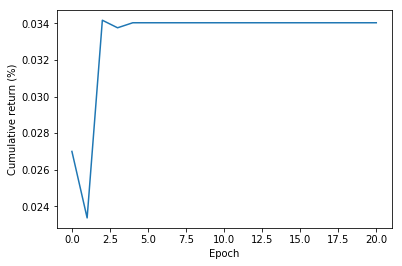

            Shares
Date              
2008-01-23      -5
2008-02-15       5
2008-02-27      -5
2008-04-01       5
2008-05-23      -5
2008-05-29       5
2008-06-02      -5
2008-07-31       5
2008-08-18      -5
2008-08-21       5
2008-09-03      -5
2008-11-06       5
2008-11-07      -5
2008-11-24       5
2008-11-25      -5
2008-12-11       5
2008-12-12      -5
2008-12-15       5
2008-12-29      -5
2008-12-30       5
2009-01-08      -5
2009-01-27       5
2009-01-29      -5
2009-03-17       5


In [5]:
# Train and test a StrategyLearner
# Set verbose to True will print out and plot the cumulative return for each training epoch
stl = StrategyLearner(num_shares=num_shares, impact=impact, 
                      commission=commission, verbose=True,
                      num_states=3000, num_actions=10)
stl.add_evidence(symbol=symbol, start_val=start_val, 
                 start_date=start_date, end_date=end_date)
df_trades = stl.test_policy(symbol=symbol, start_date=start_date,
                            end_date=end_date)
print (df_trades)

Retrieve performance stats via a market simulator

Performances during training period for ESH2009
Date Range: 2007-12-21 00:00:00 to 2009-03-19 00:00:00
Sharpe Ratio of Portfolio: 1.508118532119081
Sharpe Ratio of Benchmark : -1.4494409555943681

Cumulative Return of Portfolio: 0.03403749999999994
Cumulative Return of Benchmark : -0.03720000000000001

Standard Deviation of Portfolio: 0.0012270587106776847
Standard Deviation of Benchmark : 0.0013253523068593644

Average Daily Return of Portfolio: 0.00011657369142696322
Average Daily Return of Benchmark : -0.00012101287991553915

Final Portfolio Value: 103403.75
Final Benchmark Value: 96280.0


/Users/administrator/.virtualenvs/sklearn/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


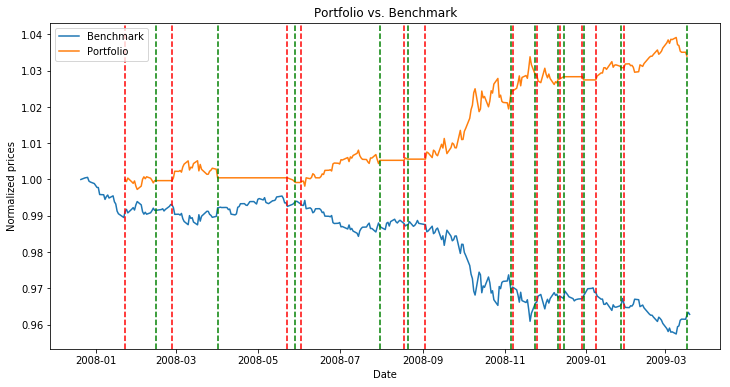

In [6]:
# Retrieve performance stats via a market simulator
print ("Performances during training period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 2) Out-of-sample performance <a class="anchor" id="second"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [7]:
start_val = 100000
symbol = "ESH2010"
commission = 0.00
impact = 0.0
num_shares = 5

In [8]:
start_date = dt.datetime(2008, 12, 19)
end_date = dt.datetime(2010, 3, 19)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [9]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2008-12-19       5
2010-03-19      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [10]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

            Shares
Date              
2009-01-21      -5
2009-03-23       5
2009-03-24      -5
2009-03-26       5
2009-03-27      -5
2009-04-09       5
2009-04-14      -5
2009-04-17       5
2009-04-20      -5
2009-04-29       5
2009-04-30      -5
2009-05-04       5
2009-05-11      -5
2009-05-26       5
2009-05-27      -5
2009-06-01       5
2009-06-02      -5
2009-07-21       5
2009-07-22      -5
2009-07-23       5
2009-07-27      -5
2009-09-15       5
2009-09-21      -5
2009-09-30       5
2009-10-01      -5
2009-12-02       5
2009-12-03      -5
2009-12-07       5
2009-12-08      -5
2010-03-05       5
2010-03-15      -5
2010-03-17       5
2010-03-18      -5
2010-03-19       5


Retrieve performance stats via a market simulator


Performances during testing period for ESH2010
Date Range: 2008-12-19 00:00:00 to 2010-03-19 00:00:00
Sharpe Ratio of Portfolio: -1.9234984673933266
Sharpe Ratio of Benchmark : 1.1224080081547325

Cumulative Return of Portfolio: -0.02218500000000001
Cumulative Return of Benchmark : 0.015009999999999968

Standard Deviation of Portfolio: 0.0006324159674514779
Standard Deviation of Benchmark : 0.0006786242341735072

Average Daily Return of Portfolio: -7.662921927322748e-05
Average Daily Return of Benchmark : 4.7982166211087105e-05

Final Portfolio Value: 97781.5
Final Benchmark Value: 101501.0


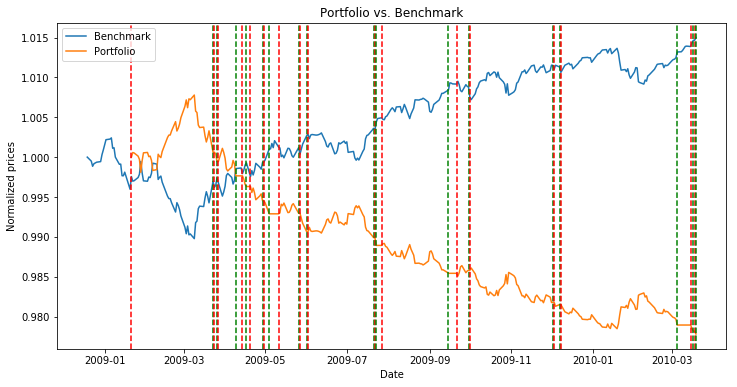

In [11]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 3) Out-of-sample performance <a class="anchor" id="third"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [12]:
start_val = 100000
symbol = "J7H2009"
commission = 0.00
impact = 0.0
num_shares = 5

In [13]:
start_date = dt.datetime(2008, 3, 18)
end_date = dt.datetime(2009, 3, 16)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [14]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2008-03-18       5
2009-03-16      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [15]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

            Shares
Date              
2008-04-16      -5
2008-05-23       5
2008-05-28      -5
2008-06-02       5
2008-06-03      -5
2008-09-29       5
2008-09-30      -5
2008-10-03       5
2008-12-23      -5
2008-12-24       5
2008-12-31      -5
2009-01-09       5
2009-01-15      -5
2009-01-30       5
2009-02-04      -5
2009-03-16       5


Retrieve performance stats via a market simulator


Performances during testing period for J7H2009
Date Range: 2008-03-18 00:00:00 to 2009-03-16 00:00:00
Sharpe Ratio of Portfolio: 1.0491109105000598
Sharpe Ratio of Benchmark : -0.032081625529452436

Cumulative Return of Portfolio: 5.095000000343575e-06
Cumulative Return of Benchmark : -2.4499999995430954e-07

Standard Deviation of Portfolio: 3.351932112360764e-07
Standard Deviation of Benchmark : 4.848620000458769e-07

Average Daily Return of Portfolio: 2.2152173660634104e-08
Average Daily Return of Benchmark : -9.798830458151997e-10

Final Portfolio Value: 100000.50950000003
Final Benchmark Value: 99999.9755


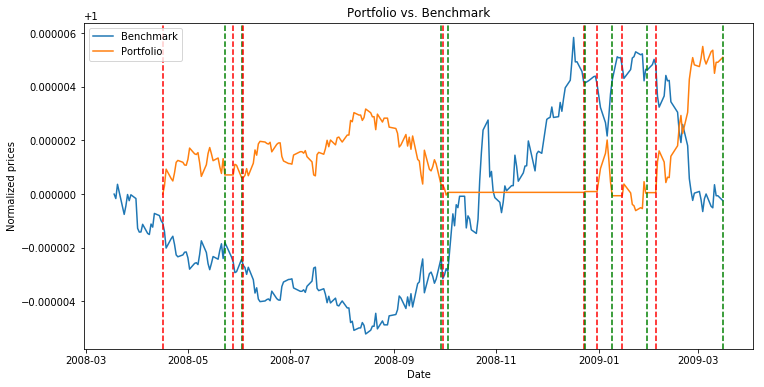

In [16]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)